In [1]:
# Final Project for week 1
# dataset choosen is Infectious Disease Cases by County, Year, and Sex
# You can find more information about the dataset here:
# https://data.chhs.ca.gov/dataset/infectious-disease-cases-by-county-year-and-sex

In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import time
import csv
%matplotlib notebook

In [23]:
path = r'/home/cambam/Desktop/Python/Coursera/Basic Data Processing and Visualization/Data Processing and Visualization/Data/infectious-disease-cases-by-county-year-and-sex-2-27-19.csv'

In [24]:
f = open(path, 'rt')

In [25]:
reader = csv.reader(f, delimiter = ',')

In [26]:
header = next(reader)

In [27]:
header

['Disease',
 'County',
 'Year',
 'Sex',
 'Count',
 'Population',
 'Rate',
 'CI. lower',
 'CI.upper',
 'Unstable']

In [28]:
# Create an empty dataset
# fields to INT or Float
dataset = []
for x in reader:
    d = dict(zip(header, x))
    for field in ['Year', 'Count', 'Population']:
        d[field] = int(d[field])
    for field in ['Rate', 'CI. lower', 'CI.upper']:
        d[field] = float(d[field])
    dataset.append(d)

In [29]:
len(dataset)

132927

In [30]:
dataset[0]

{'Disease': 'Amebiasis',
 'County': 'Solano',
 'Year': 2005,
 'Sex': 'Total',
 'Count': 0,
 'Population': 410570,
 'Rate': 0.0,
 'CI. lower': 0.0,
 'CI.upper': 0.898,
 'Unstable': '-'}

In [31]:
# Data Filtering and Cleaning

In [32]:
# I want to see all the last 10 years of data collected
dataset = [d for d in dataset if d['Year'] >= 2006]

In [33]:
# filter by small towns / under 10 thousand in population
smallTowns = [d for d in dataset if d['Population'] <= 10000]

In [34]:
smallTowns[0]

{'Disease': 'Amebiasis',
 'County': 'Mono',
 'Year': 2015,
 'Sex': 'Male',
 'Count': 0,
 'Population': 7253,
 'Rate': 0.0,
 'CI. lower': 0.0,
 'CI.upper': 50.847,
 'Unstable': '-'}

In [35]:
# filter by large cities / over a millon in popualtion
largeCities = [d for d in dataset if d['Population'] >= 1000000]

In [36]:
largeCities[0]

{'Disease': 'Amebiasis',
 'County': 'Los Angeles',
 'Year': 2014,
 'Sex': 'Female',
 'Count': 17,
 'Population': 5127242,
 'Rate': 0.332,
 'CI. lower': 0.193,
 'CI.upper': 0.531,
 'Unstable': '*'}

In [127]:
malaria = [d for d in dataset if d['Disease'] == 'Malaria']

In [40]:
lowerYear = [d for d in dataset if d['Disease'] == 'Malaria']

In [136]:
type(malaria)

list

In [64]:
len(lowerYear)

1770

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ValueError: setting an array element with a sequence

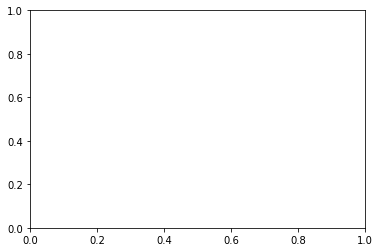

In [159]:
# Instead of a single estimate for the mean, a confidence interval 
# generates a lower and upper limit for the mean. ... That is, for 
# a 95 % confidence interval, if many samples are collected and the 
# confidence interval computed, in the long run about 95 % of these 
# intervals would contain the true mean.
malaria = [d for d in dataset if d['Disease'] == 'Malaria']
year = [d['Year'] for d in dataset if d['Disease'] == 'Malaria']
ci_Upper = [d['CI.upper'] for d in dataset if d['Disease'] == 'Malaria']
year = sorted(lowerYear) 

for x in malaria:
    y = sorted(x.items()) # sorted by key, return a list of tuples
    lists.append(y)
x, y = zip(*lists) # unpack a list of pairs into two tuples

print(lists)
   
plt.plot( x, y)
#plt.plot( 'Year', 'Count', data=malaria)

In [116]:
# Separate male and female count totals to find total number of men infected 
# vs female. This could also be use to show totals on individual disease

male = [d for d in dataset if d['Sex'] == 'Male']
female = [d for d in dataset if d['Sex'] == 'Female']

maleCount = 0
femaleCount = 0
for x in male:
    maleCount += x['Count']

for x in female:
    femaleCount += x['Count']

In [119]:
# As you can see a large number of men infected
print(maleCount)
print(femaleCount)

782795
453444


<BarContainer object of 1 artists>

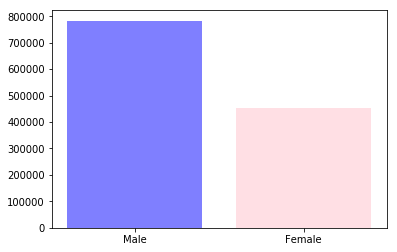

In [123]:
# Same number shown in a bar chart
alpha_color = 0.5
x = ['Male', 'Female']
plt.bar(x[0], maleCount, color='blue', alpha=alpha_color)
plt.bar(x[1], femaleCount, color='pink', alpha=alpha_color)

In [93]:
# created three list to find out if there are more men than women in 
# this dataset. However, I get an equal amount
print(len(male))
print(len(female))

30444
30444


In [276]:
# This function takes a dataset and creates a defaultdict to average
# the rates by year for Amebiasis
def amebiasisRates(ds):
    ds = [d for d in ds if d['Disease'] == 'Amebiasis']
    count = {2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0}
    count = defaultdict(int)
    
    for d in ds:
        count[d['Year']] += d['Count']
    
    return count

In [281]:
# This function takes a dataset and creates a defaultdict to average
# the rates by year for Malaria
def malariaRates(ds):
    ds = [d for d in ds if d['Disease'] == 'Malaria']
    count = {2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0}
    count = defaultdict(int)
    
    for d in ds:
        count[d['Year']] += d['Rate']
    
    return count

In [282]:
# This function takes a dataset and creates a defaultdict to average
# the rates by year for Hepatitis C
def hepatitisRates(ds):
    ds = [d for d in ds if d['Disease'] == 'Hepatitis C, Chronic']
    count = {2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0}
    count = defaultdict(int)
    
    for d in ds:
        count[d['Year']] += d['Rate']
    
    return count

In [283]:
amebiasisRates(largeCities)

defaultdict(int,
            {2014: 895,
             2013: 814,
             2008: 1371,
             2011: 1123,
             2007: 1374,
             2009: 1278,
             2006: 1069,
             2010: 1301,
             2012: 1213,
             2015: 949})

<IPython.core.display.Javascript object>


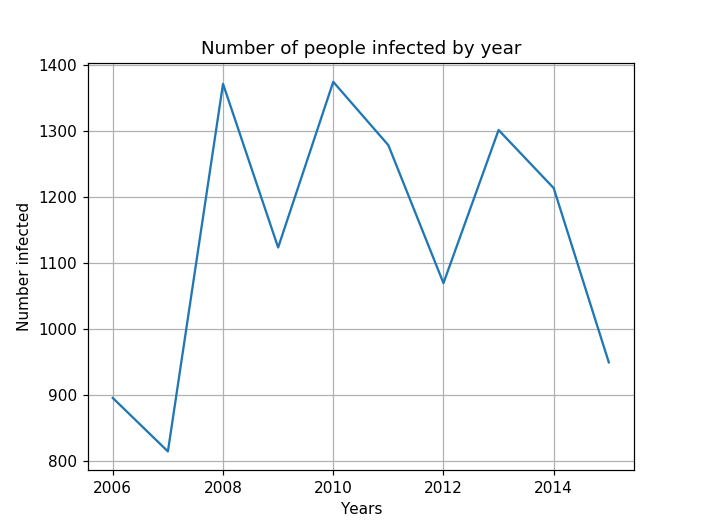

In [284]:
# This visual show the number of people infected by year.
# You can replace the module in X and Y to show different diseases
# or change the agruement to show small or large cities.
# you can also show the whole dataset

X = list(amebiasisRates(largeCities).keys())
Y = list(amebiasisRates(largeCities).values())
X = sorted(X)

plt.gca().set(xlabel='Years', ylabel='Number infected',
       title='Number of people infected by year')
plt.grid()

# Show the plot of Rings vs Number of Abalones
plt.plot(X, Y)

In [ ]:
Bar

In [269]:
plt.scatter(X,Y)
plt.show()